In [40]:
import numpy as np

from TraceSimulator import TraceSimulator
from trace_IO import *
from OptimumFilter import *

import matplotlib.pyplot as plt


In [53]:
sampling_frequency = 3906250
template_1 = np.load("./sub_ch_template.npy")
template_2 = np.load("./vac_ch45_low_eng.npy")
template_3 = np.load("./vac_ch46plus_low_eng.npy")
noise_psd = np.load("../templates/noise_psd_from_MMC.npy")

# Initialize Optimum Filter
trigger_1 = OFtrigger(template_1, noise_psd, sampling_frequency)
trigger_2 = OFtrigger(template_2, noise_psd, sampling_frequency)
trigger_3 = OFtrigger(template_3, noise_psd, sampling_frequency)


In [31]:
loaded_traces = load_traces_from_zstd("/ceph/dwong/trigger_samplesMMC_noise_1000.zst", n_traces=1000)
loaded_traces.shape

(1000, 54, 32768)

In [54]:
traces = loaded_traces[0]
amps = np.zeros(54)
chisqs = np.zeros(54)
t0s = np.zeros(54, dtype=int)

for ch in range(54):
    if ch <= 44:
        amp, chisq= trigger_1.fit(traces[ch])
    elif ch == 45:
        amp, chisq= trigger_2.fit(traces[ch])
    else:
        amp, chisq= trigger_3.fit(traces[ch])

    amps[ch] = amp
    chisqs[ch] = chisq


In [51]:
amps


array([ 0.50128718,  0.84187686,  0.87936936,  0.60784273, -1.23269884,
       -0.4347339 , -0.21805858, -0.30358055,  0.63080202,  0.737594  ,
        0.60163117,  0.67472352,  0.20945295,  0.12079974,  0.90248496,
        0.60631127, -0.64088494, -1.33130256,  0.3332216 ,  0.39156099,
        0.93986101, -0.55307355,  0.51957723, -1.13311428, -1.37474904,
       -0.57602837, -0.5283151 ,  0.27121579, -0.5457823 ,  0.30717829,
        0.89151388, -0.12139412,  0.98364217, -0.87123049, -1.76648861,
       -0.28484253, -1.37791706,  1.51995498,  1.22510907,  0.77431002,
       -0.0310928 , -0.29684043, -0.76872753,  0.93704468, -1.03839644,
        0.87623306, -0.03424442,  0.3644385 , -0.61553351, -0.62638215,
        0.39198342, -0.0221878 ,  0.51478081,  1.19006308])

In [52]:
chisqs

array([0.87163583, 0.86955129, 0.86981427, 0.87231437, 0.86916536,
       0.87120481, 0.86890676, 0.87137873, 0.87033695, 0.86991159,
       0.87128914, 0.87026387, 0.87095164, 0.87218331, 0.87215434,
       0.87102952, 0.87018763, 0.86968161, 0.86984538, 0.87117401,
       0.87097406, 0.87177543, 0.87065879, 0.87014718, 0.86880996,
       0.8704801 , 0.8706422 , 0.87162058, 0.87094323, 0.86961202,
       0.87011978, 0.87042524, 0.87000114, 0.86947178, 0.8694006 ,
       0.86765243, 0.87041269, 0.87104064, 0.87046887, 0.87024828,
       0.87143048, 0.87089243, 0.8703902 , 0.87156217, 0.87053687,
       0.87150826, 0.87244206, 0.87141955, 0.87157645, 0.87111489,
       0.87149603, 0.87084092, 0.86945074, 0.87180985])

In [55]:
amps

array([ 0.50120565,  0.84211446,  0.87948661,  0.60807247, -1.23282911,
       -0.43459474, -0.21798571, -0.30338346,  0.63072178,  0.73746052,
        0.60185258,  0.67489929,  0.2092959 ,  0.1209344 ,  0.90237414,
        0.60641024, -0.64097905, -1.33112066,  0.33305543,  0.39155795,
        0.93966737, -0.55315417,  0.51938226, -1.13331836, -1.37492823,
       -0.57585658, -0.52847767,  0.27112861, -0.54582849,  0.30706145,
        0.8916416 , -0.12134566,  0.98386367, -0.87132938, -1.76625258,
       -0.28469948, -1.37810726,  1.52004685,  1.22497294,  0.77447998,
       -0.03084951, -0.29693892, -0.76884177,  0.93686724, -1.03830481,
        0.87542133, -0.03402331,  0.36400535, -0.61589258, -0.6267098 ,
        0.39258948, -0.02175847,  0.51560975,  1.18985806])

In [57]:
chisqs

array([0.21791257, 0.2174186 , 0.21746106, 0.21810737, 0.21730059,
       0.21781174, 0.21722957, 0.21786585, 0.21758774, 0.21748759,
       0.21784902, 0.21758279, 0.21775133, 0.21805571, 0.21804526,
       0.21776271, 0.21755173, 0.21743842, 0.21747638, 0.2177935 ,
       0.21776394, 0.21794739, 0.2176854 , 0.21755949, 0.21721999,
       0.21763611, 0.21767496, 0.21790928, 0.21773696, 0.21741044,
       0.21753883, 0.21760758, 0.21752702, 0.21737327, 0.21738049,
       0.21692425, 0.21762286, 0.21776476, 0.2176273 , 0.21757782,
       0.21788989, 0.21772839, 0.21760465, 0.21790771, 0.21763878,
       0.21790542, 0.218112  , 0.21786061, 0.21789804, 0.21778199,
       0.21788521, 0.21771585, 0.21738366, 0.21795374])

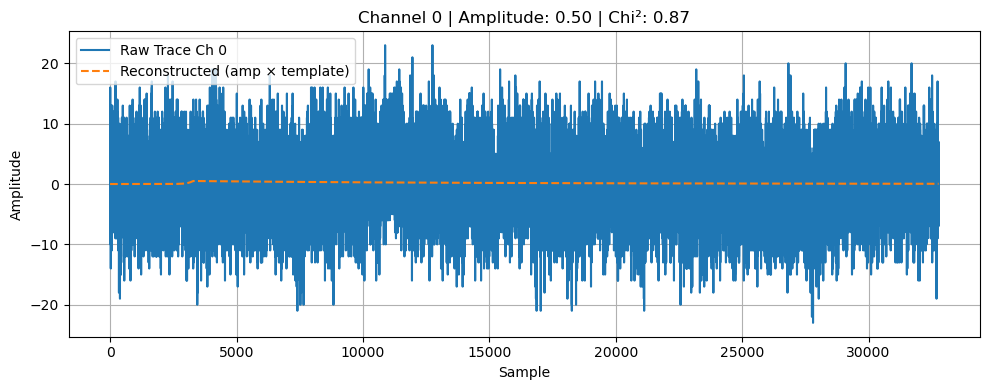

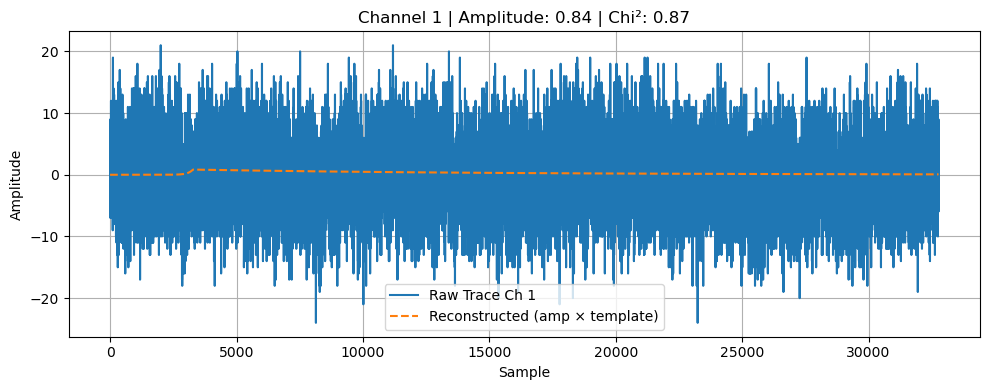

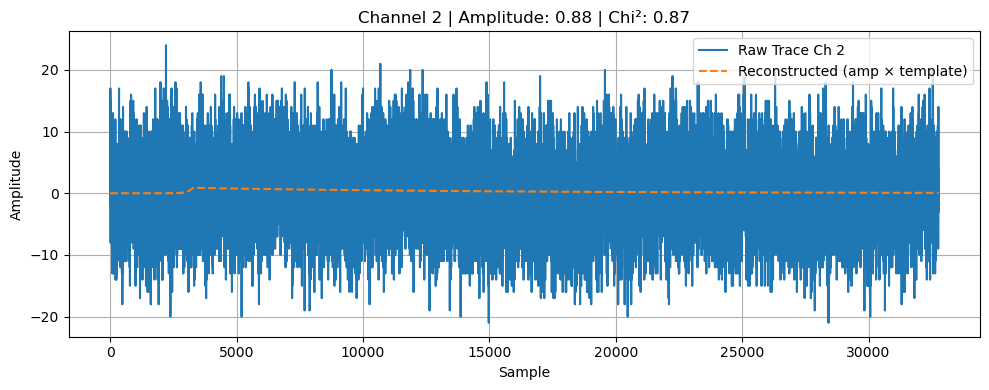

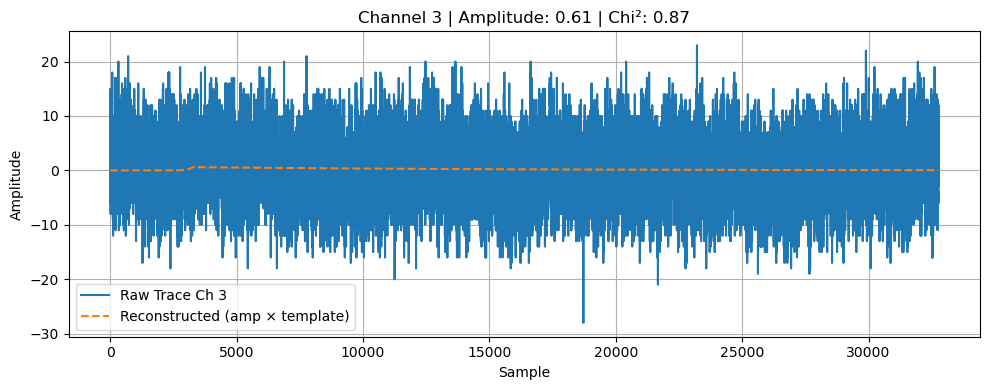

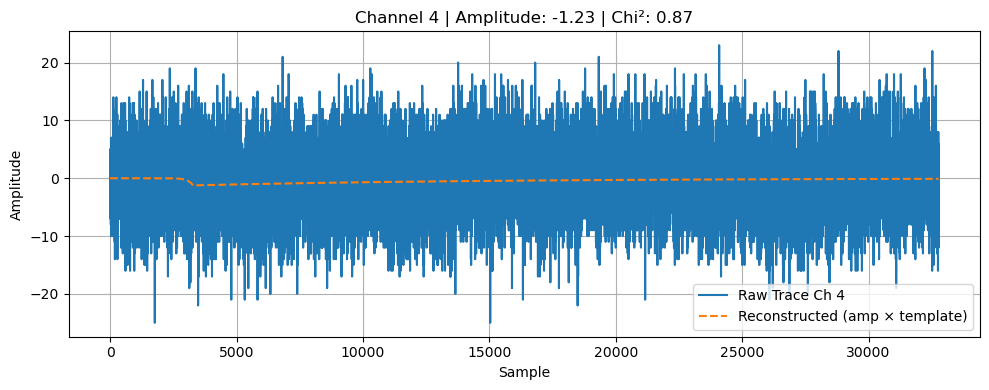

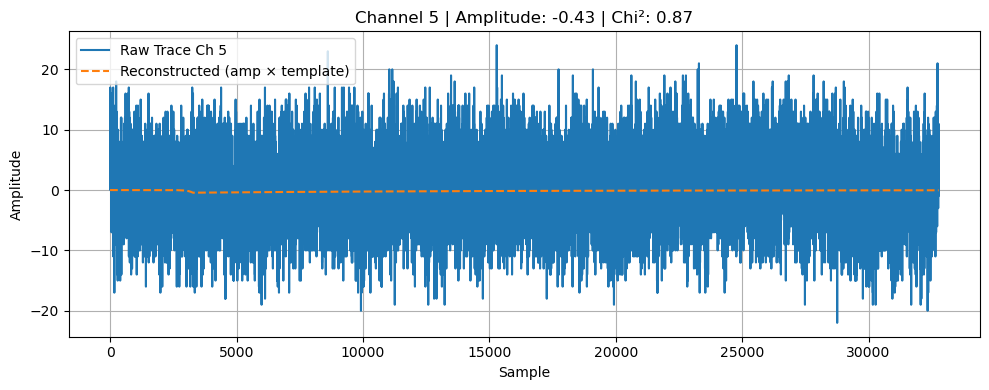

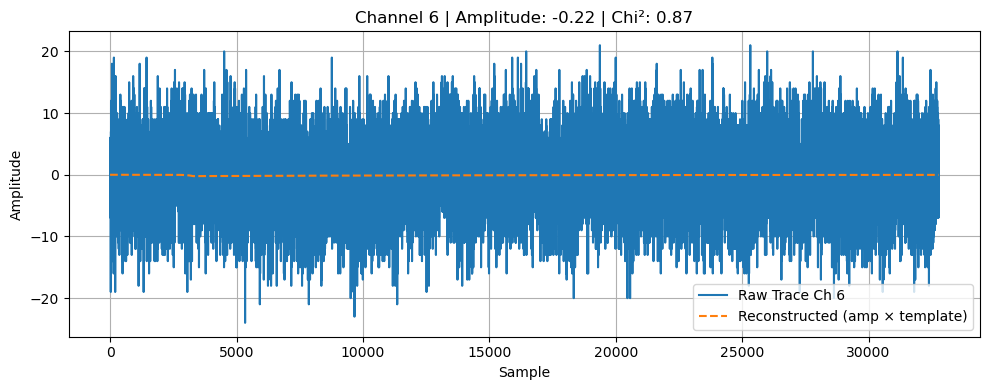

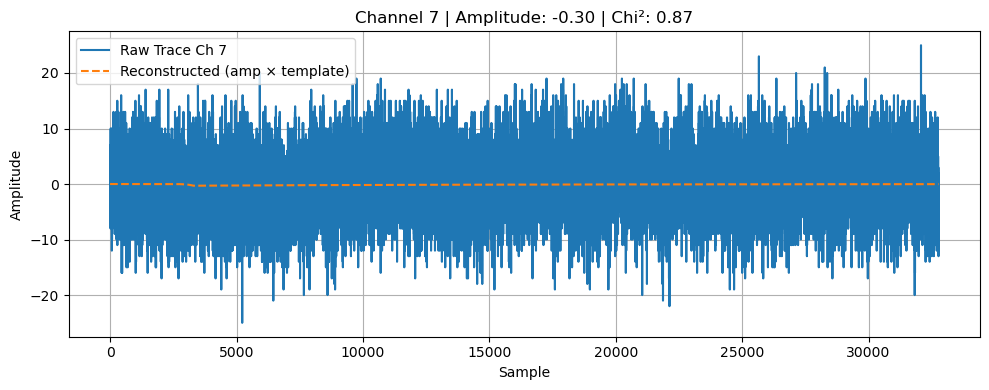

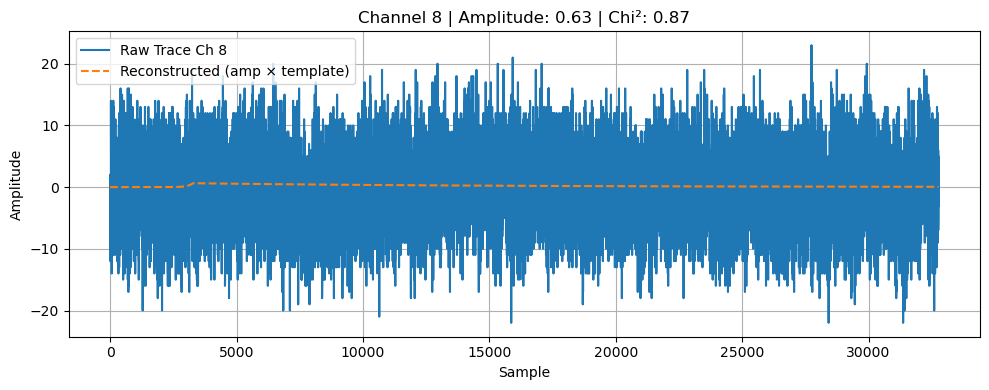

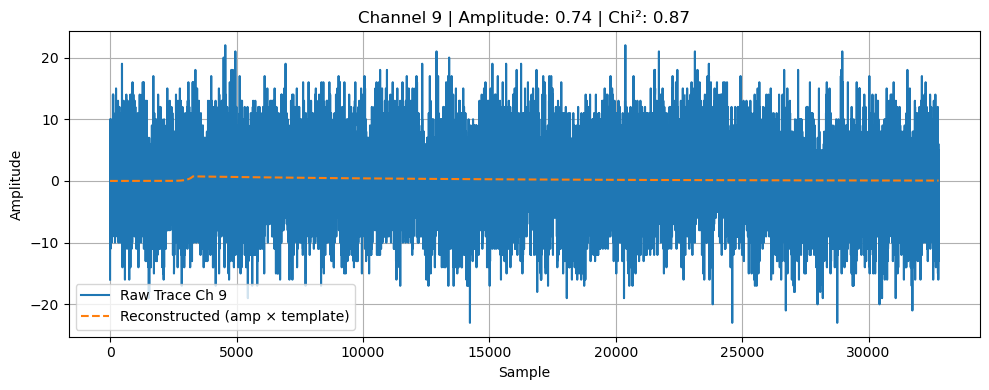

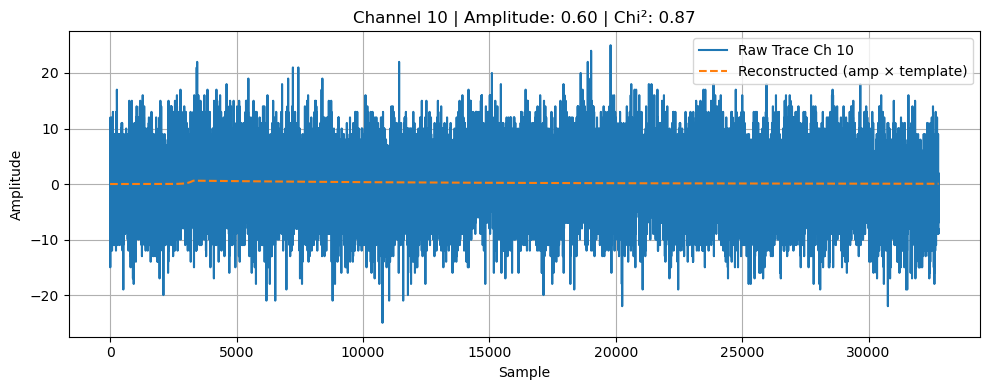

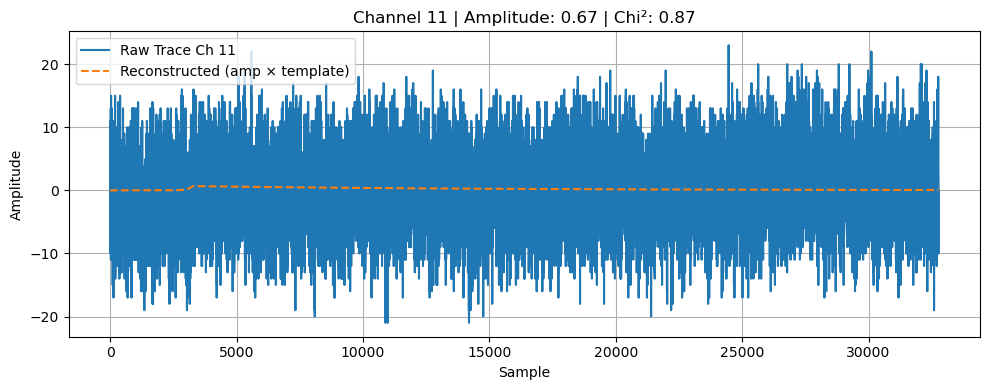

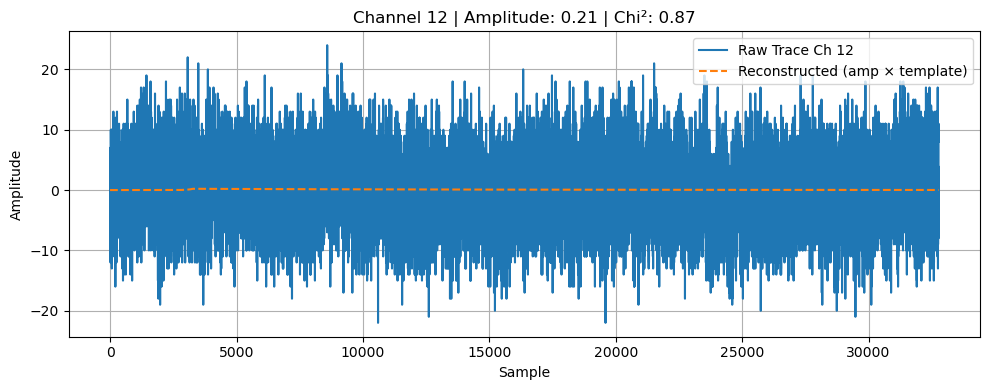

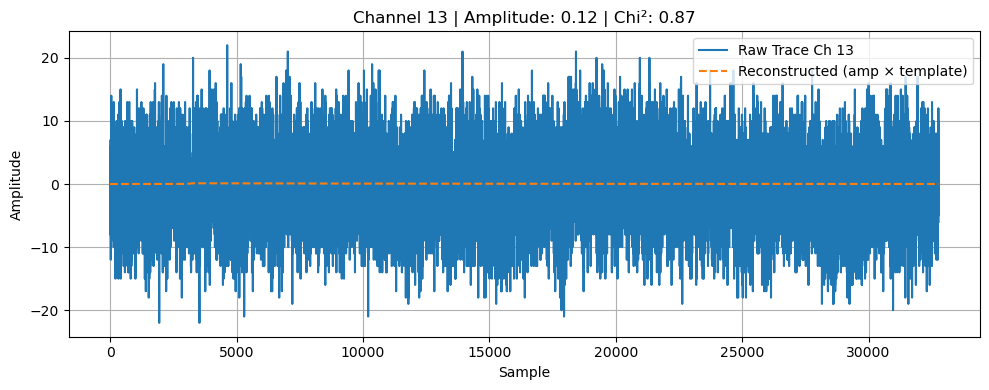

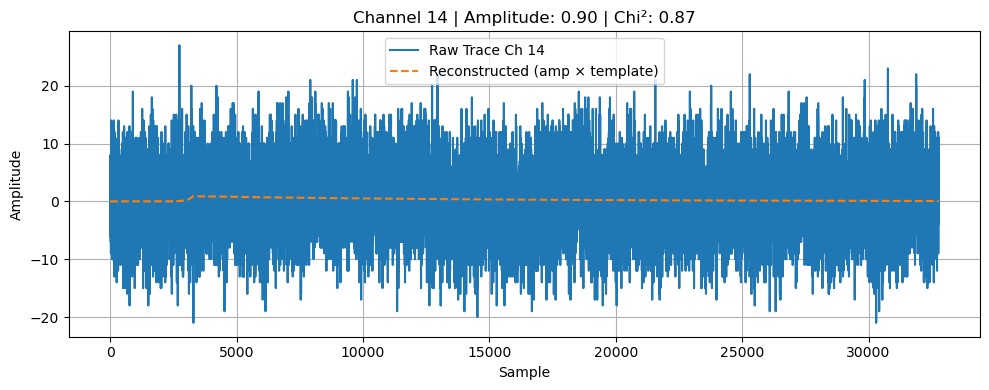

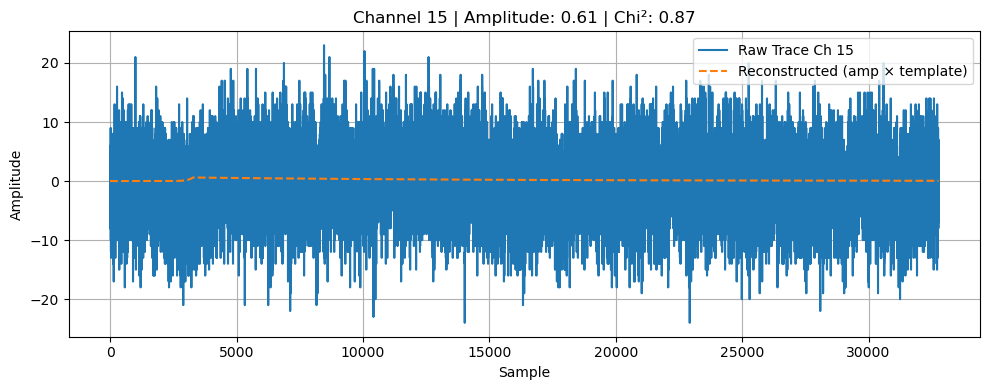

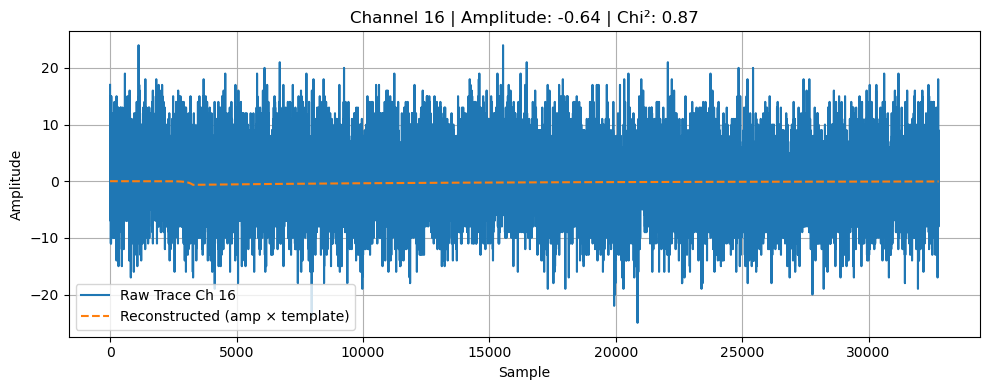

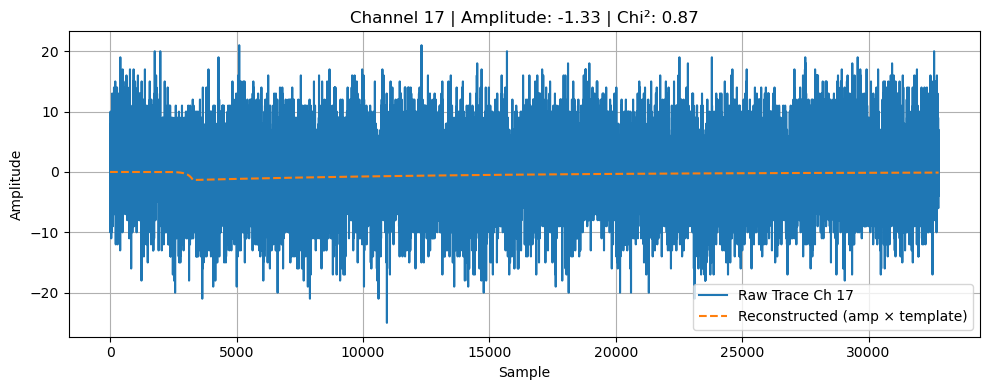

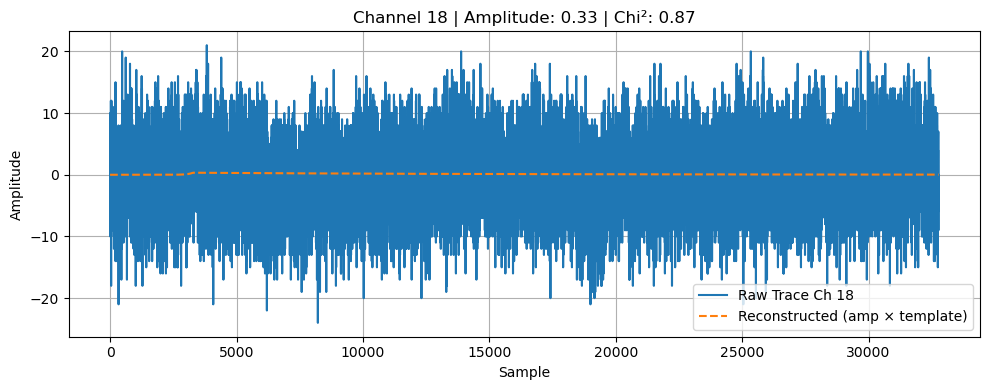

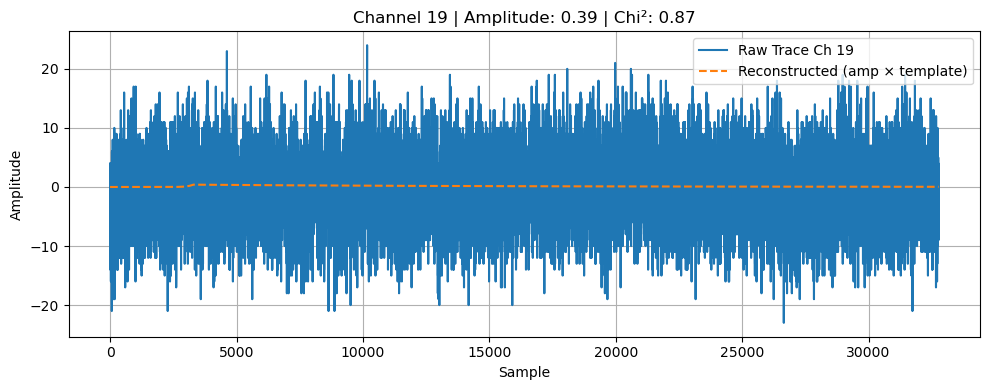

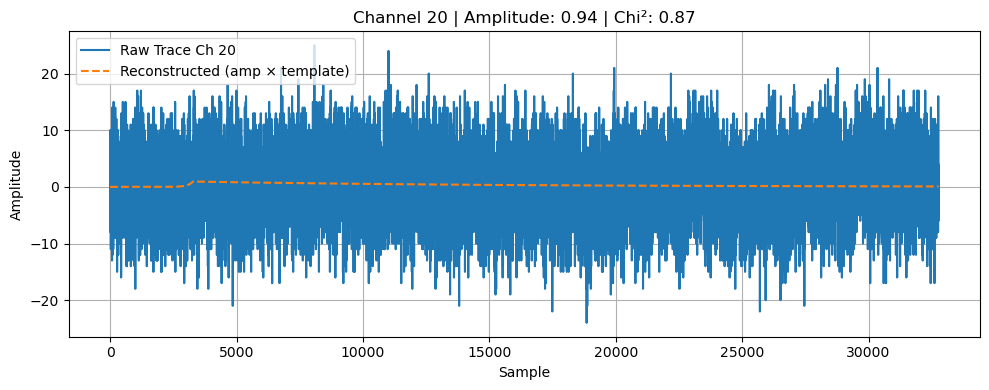

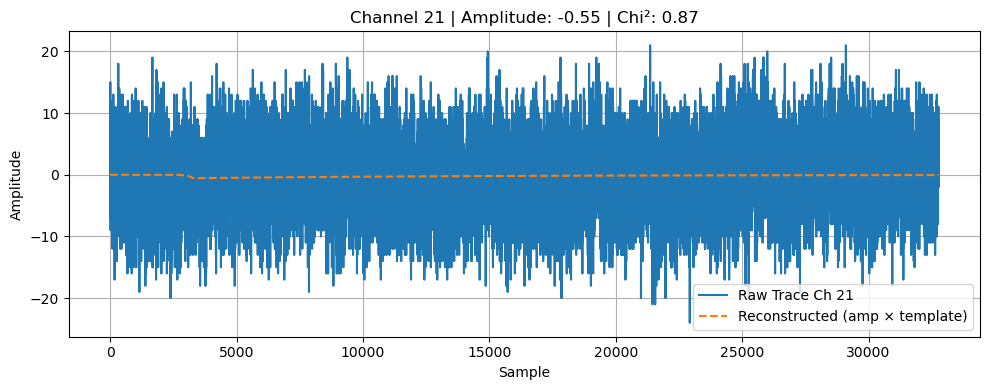

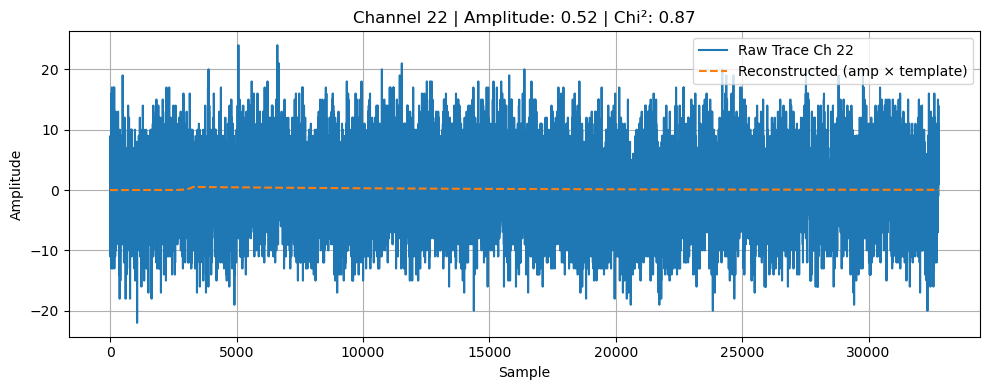

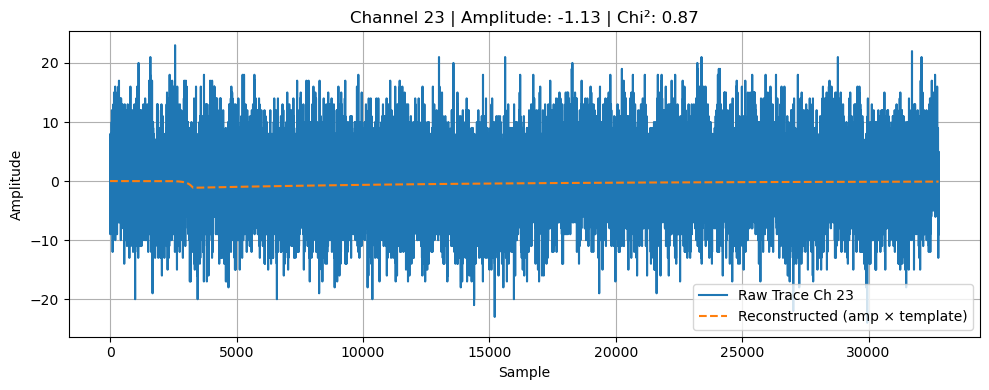

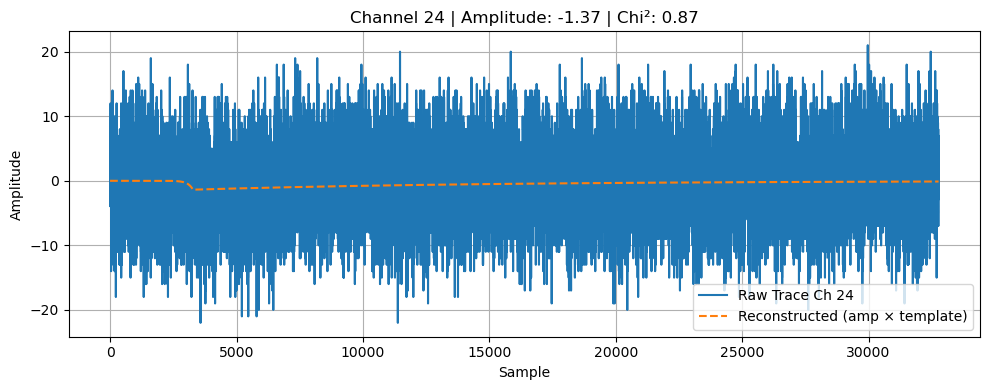

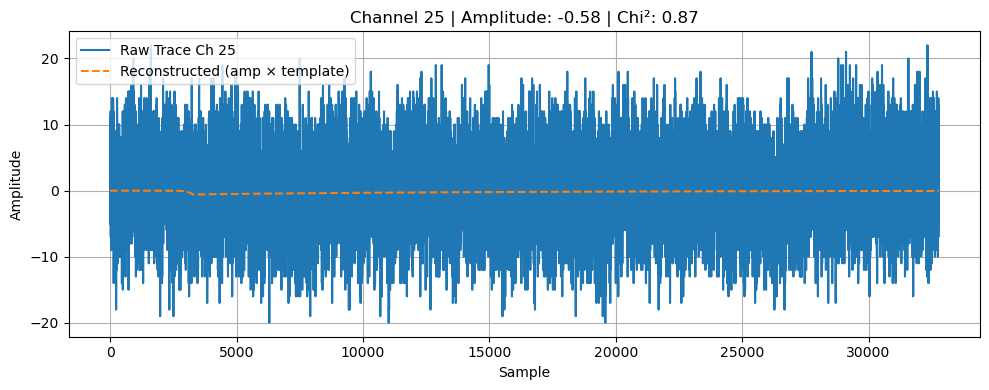

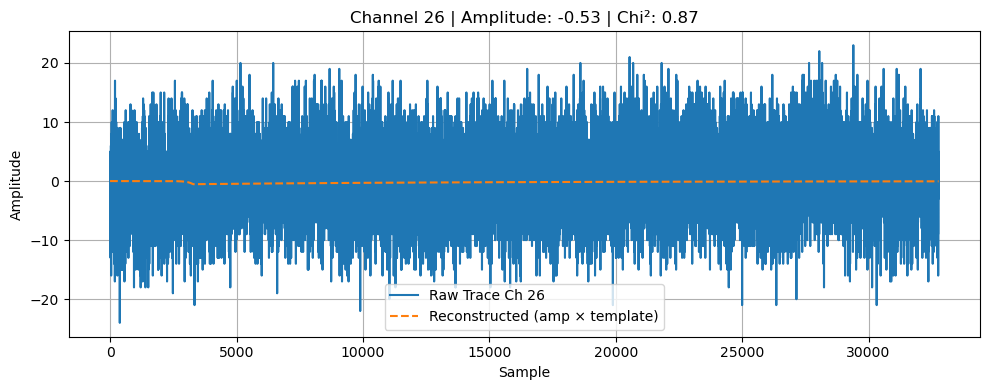

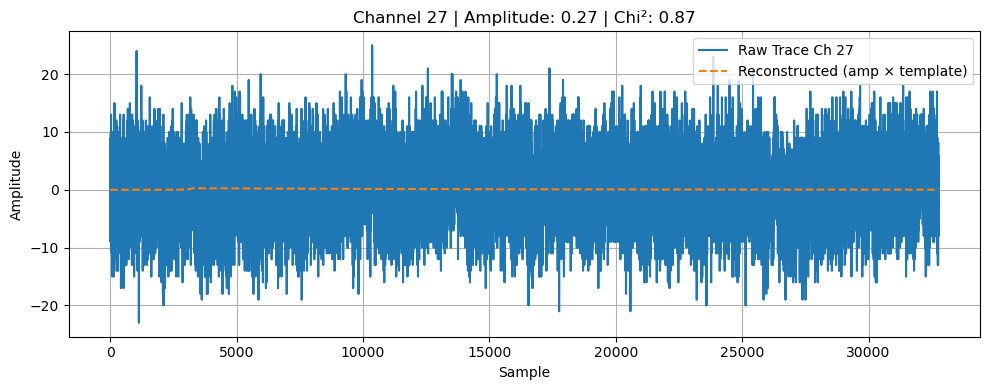

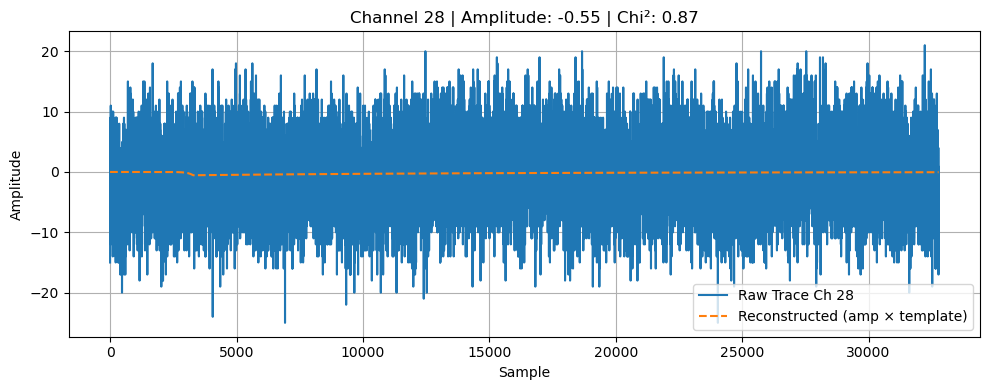

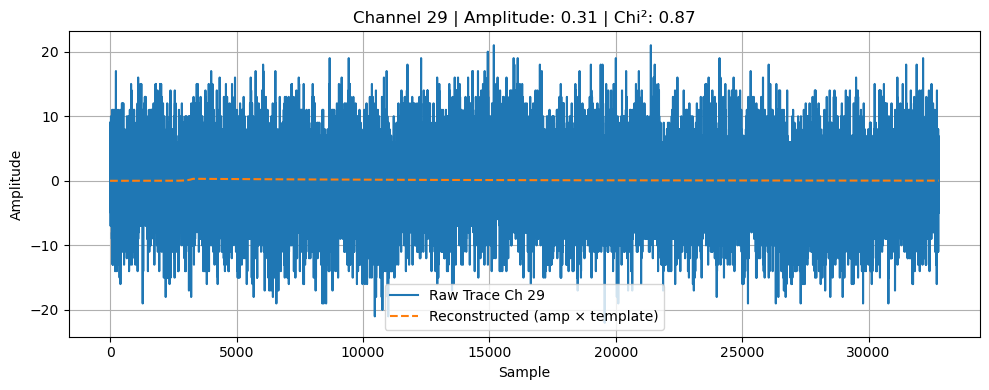

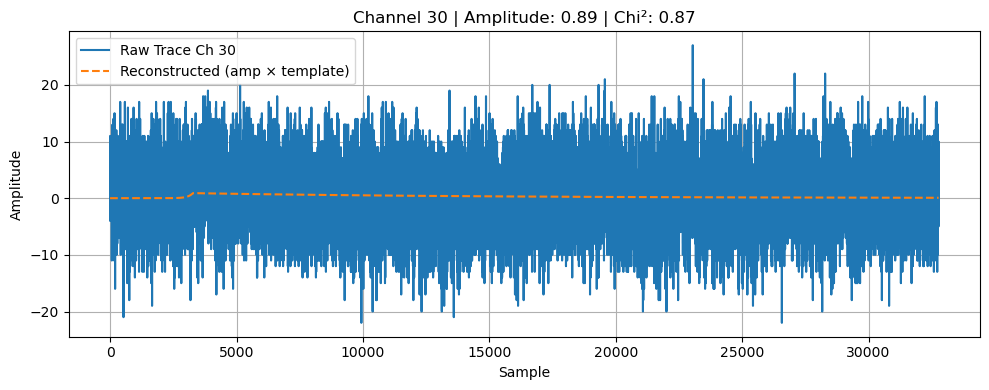

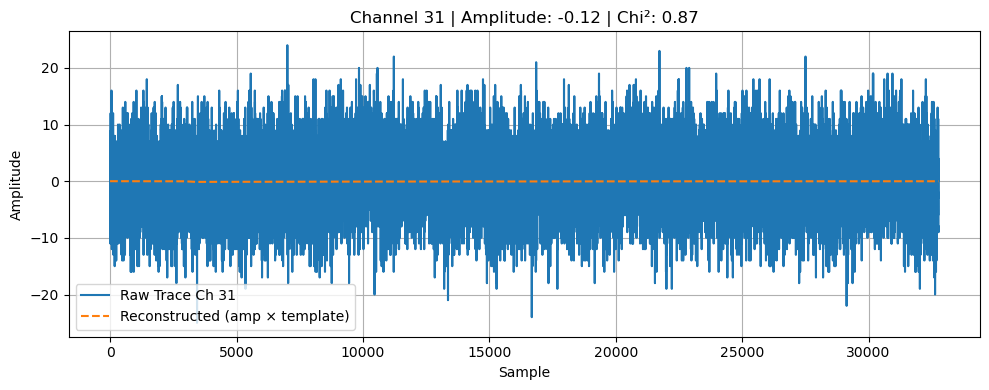

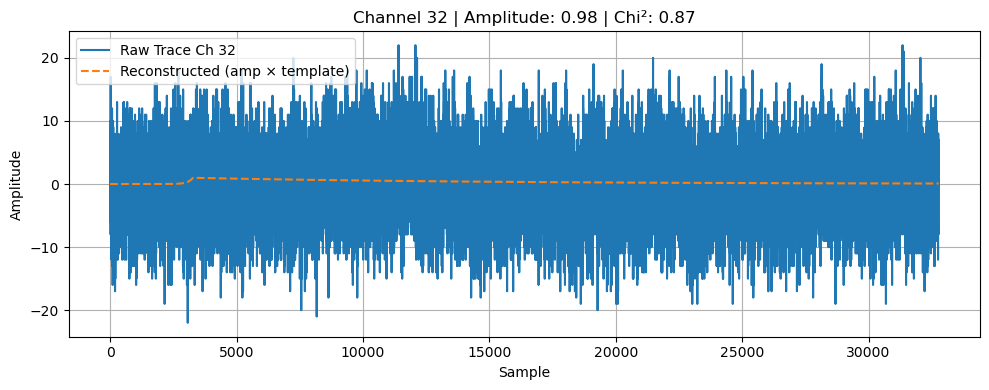

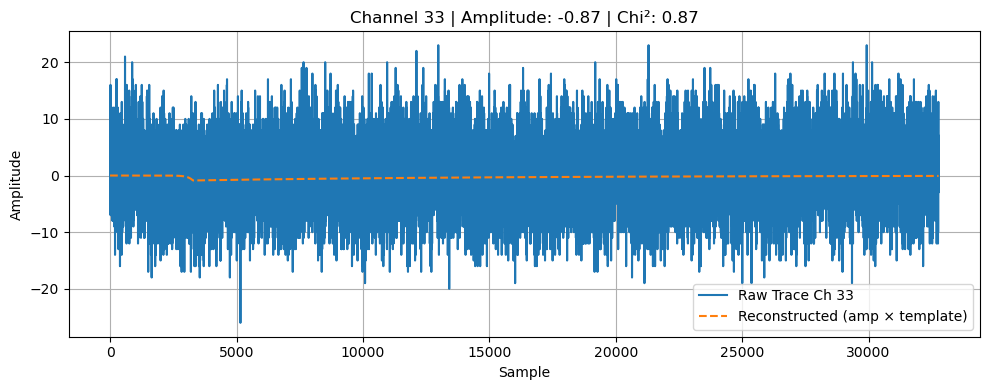

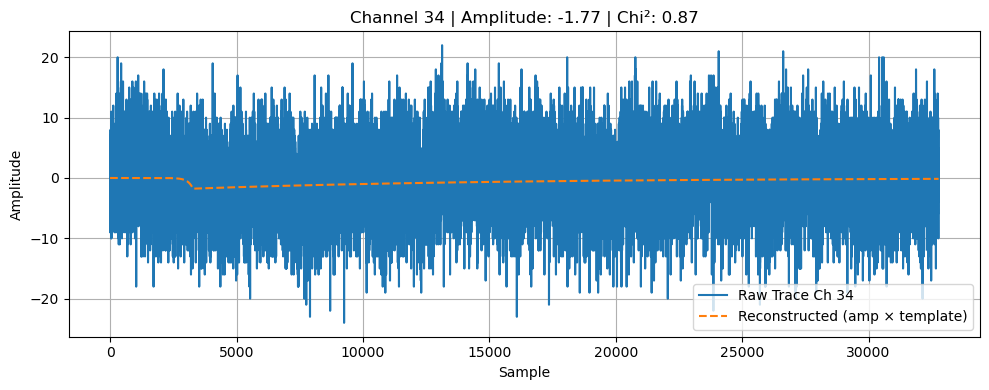

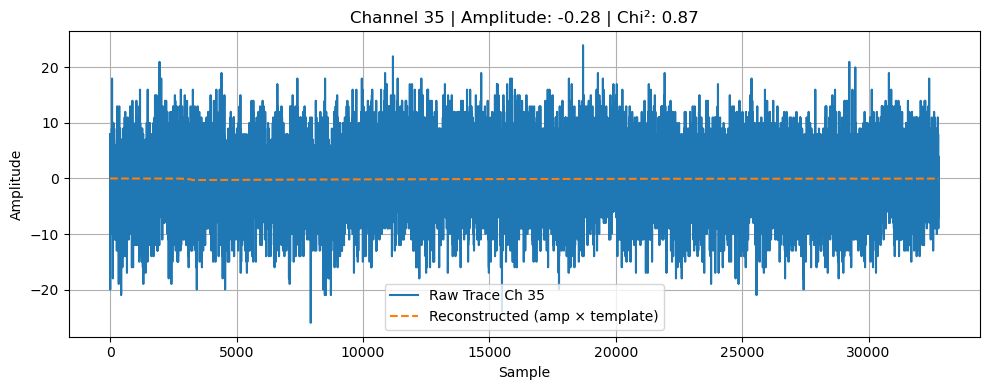

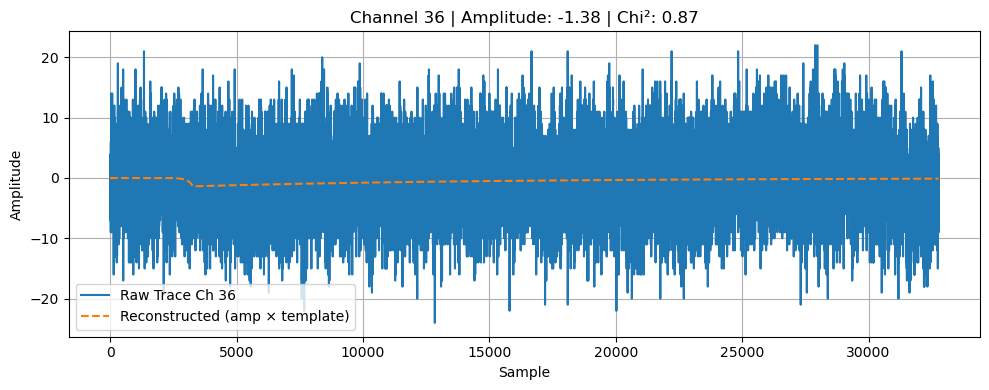

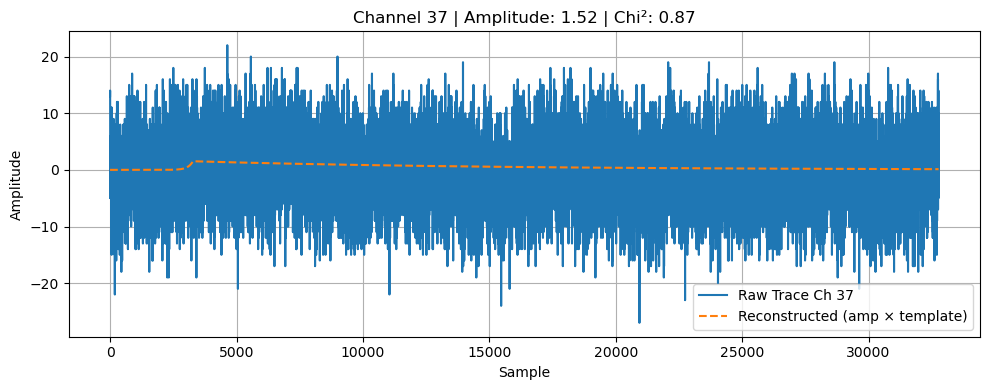

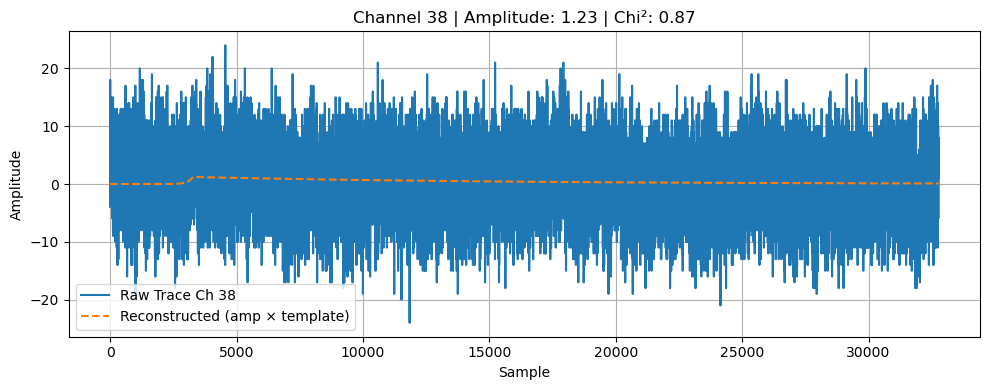

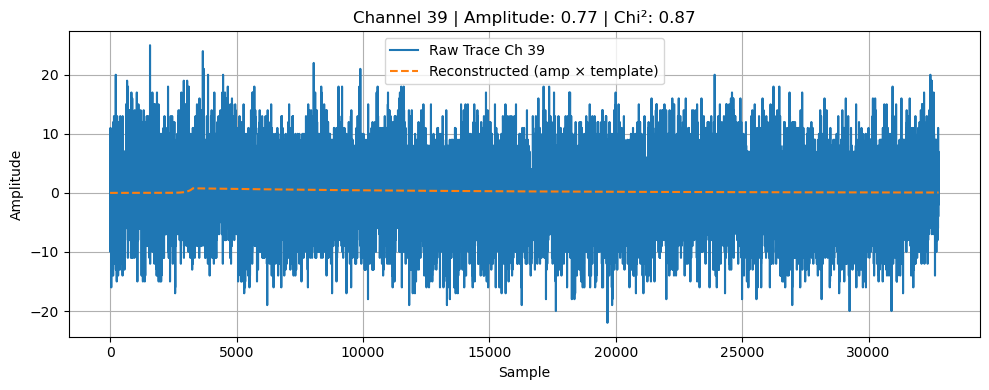

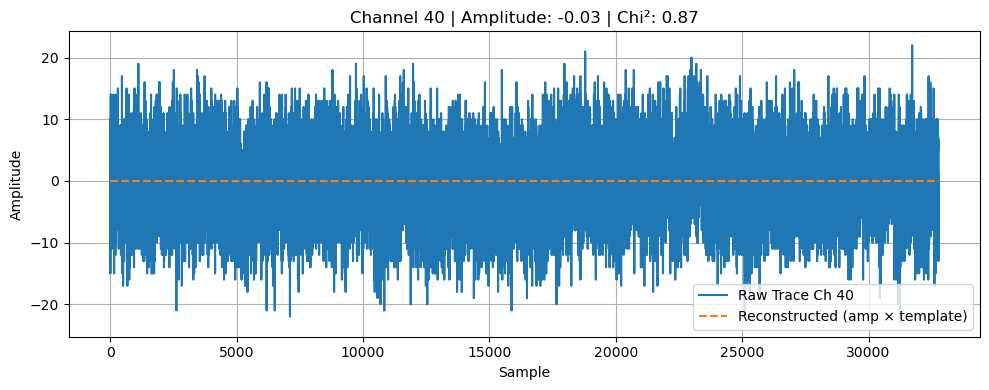

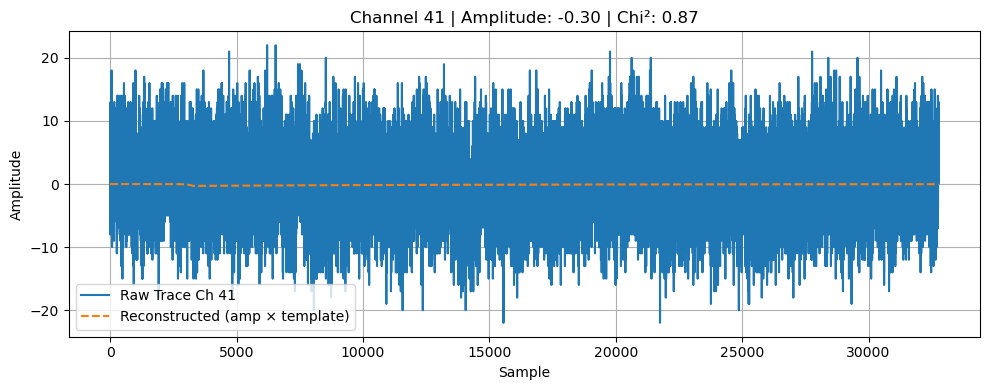

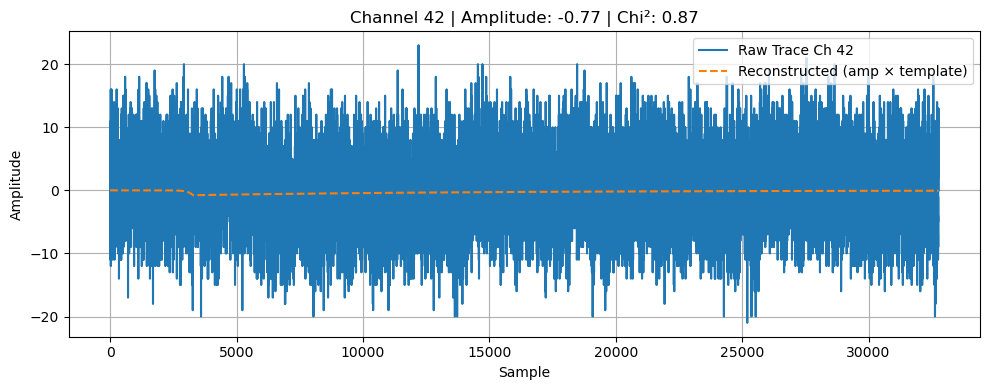

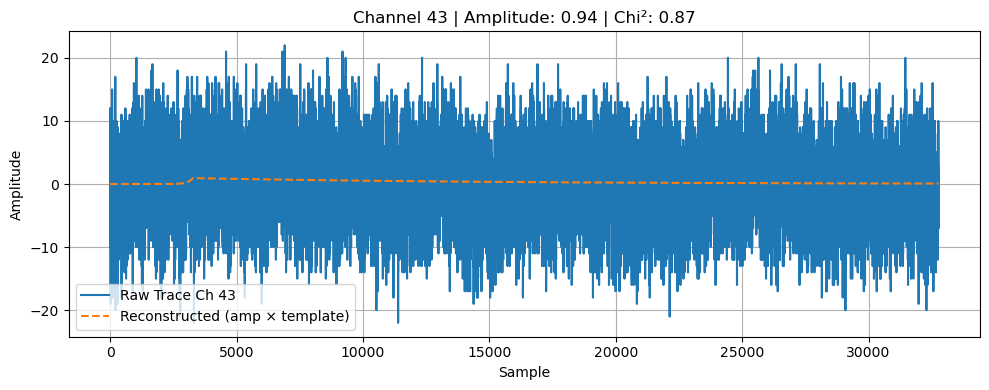

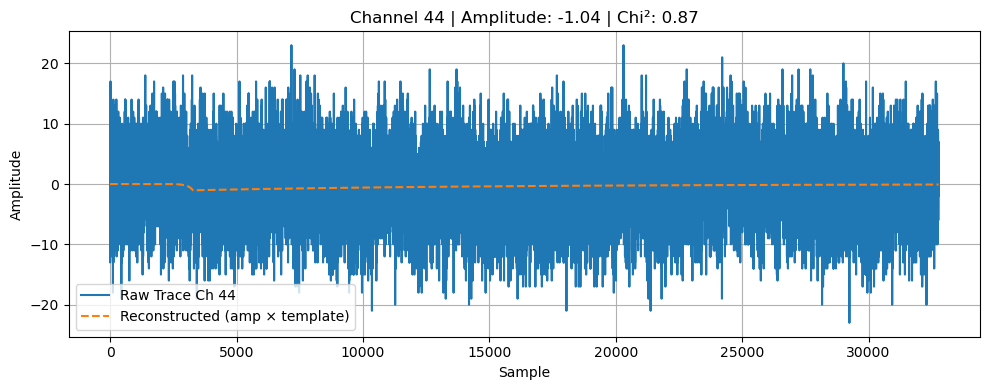

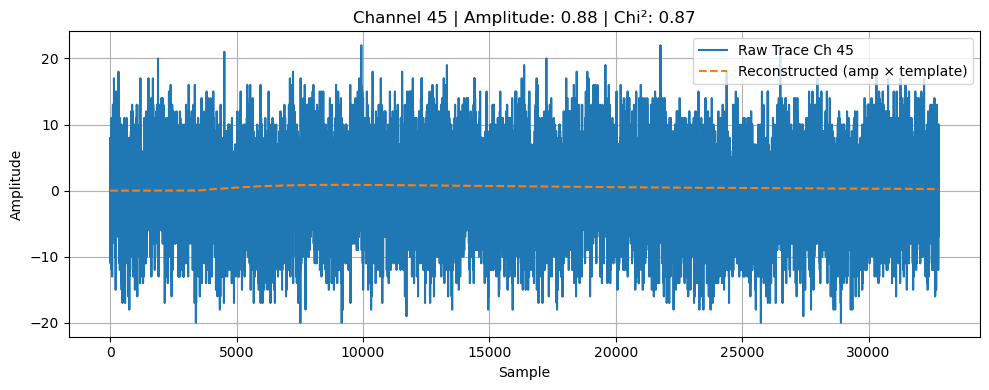

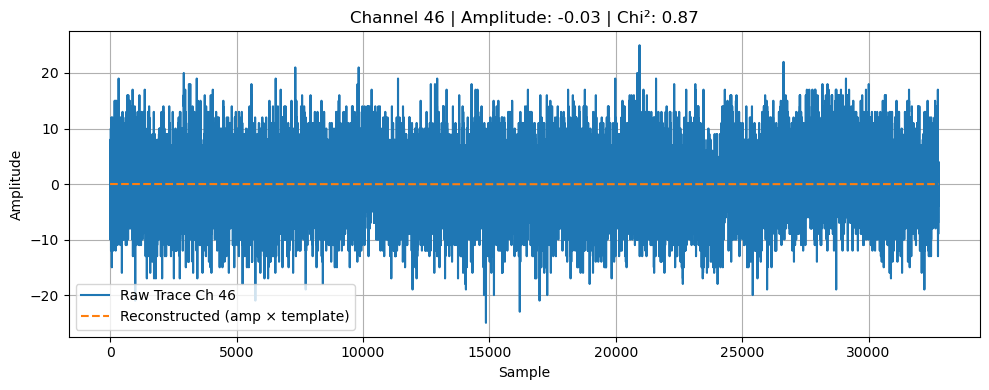

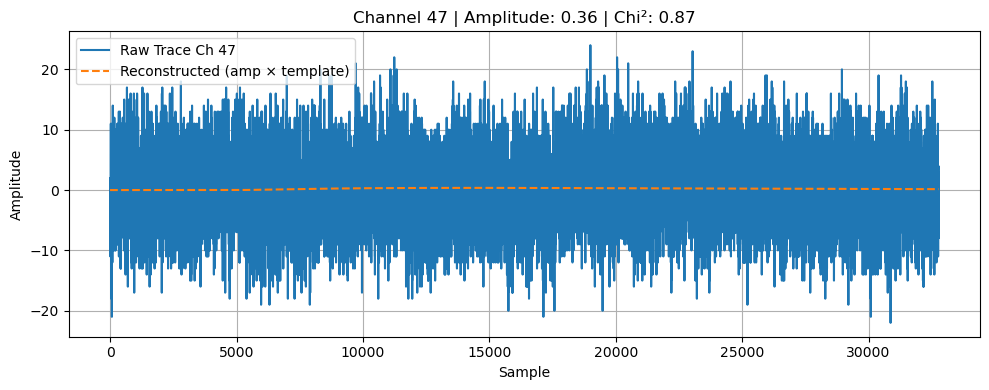

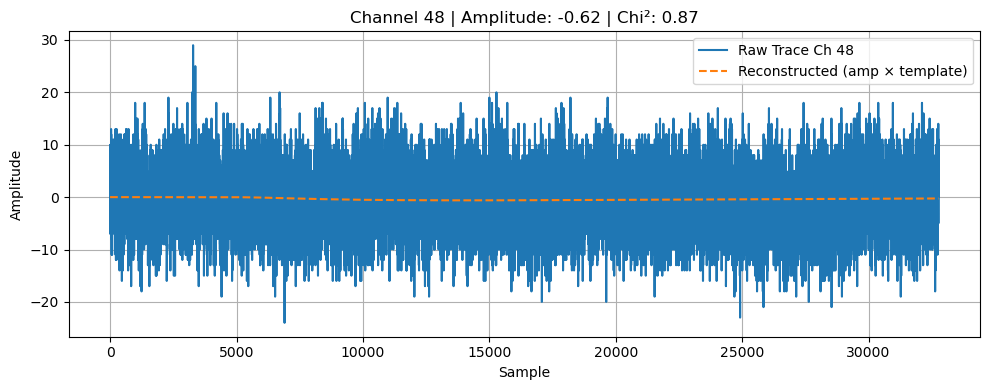

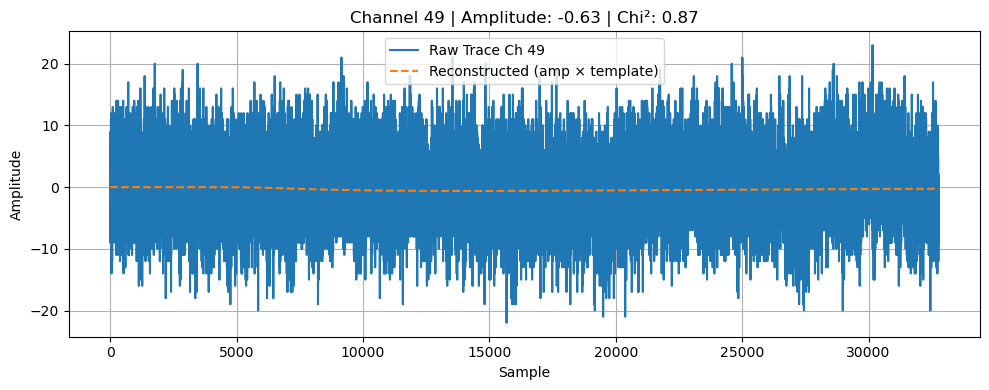

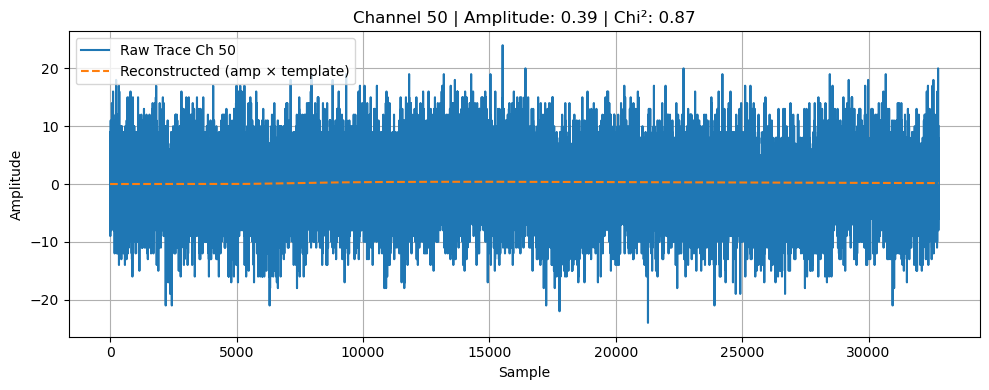

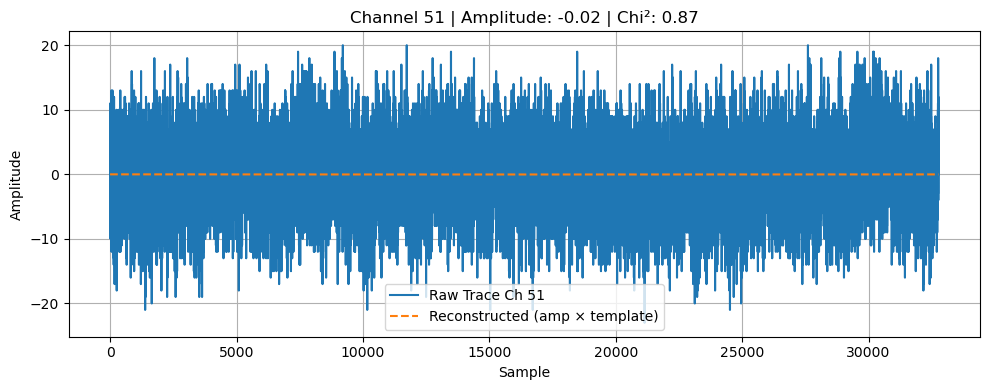

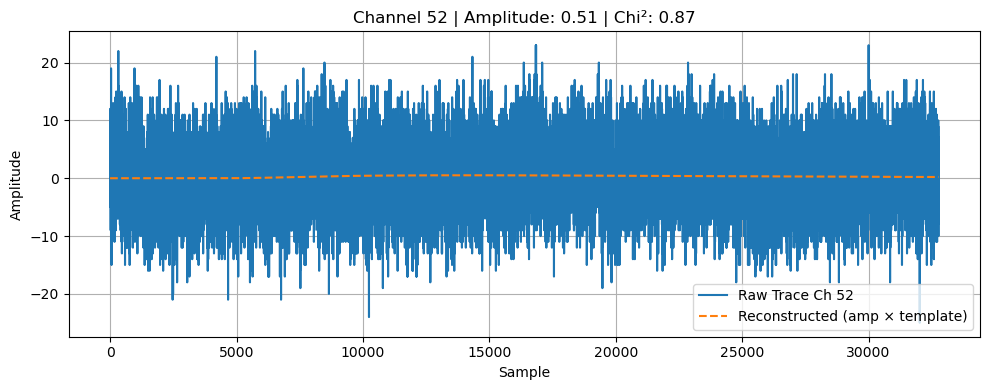

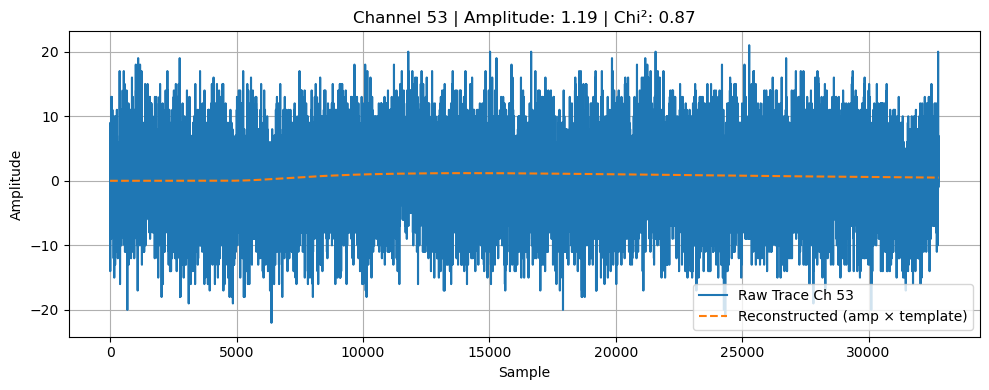

In [44]:
import matplotlib.pyplot as plt

traces = loaded_traces[0]  # shape: (54, trace_length)
amps = np.zeros(54)
chisqs = np.zeros(54)
t0s = np.zeros(54, dtype=int)

# For plotting
templates = {
    "1": trigger_1._template,
    "2": trigger_2._template,
    "3": trigger_3._template,
}

for ch in range(54):
    if ch <= 44:
        amp, chisq = trigger_1.fit(traces[ch])
        template = templates["1"]
    elif ch == 45:
        amp, chisq = trigger_2.fit(traces[ch])
        template = templates["2"]
    else:
        amp, chisq = trigger_3.fit(traces[ch])
        template = templates["3"]

    amps[ch] = amp
    chisqs[ch] = chisq

    # Plot raw trace and reconstructed signal
    plt.figure(figsize=(10, 4))
    plt.plot(traces[ch], label=f'Raw Trace Ch {ch}')
    plt.plot(amp * template, label='Reconstructed (amp × template)', linestyle='--')
    plt.title(f'Channel {ch} | Amplitude: {amp:.2f} | Chi²: {chisq:.2f}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [48]:
chisqs

array([0.87163583, 0.86955129, 0.86981427, 0.87231437, 0.86916536,
       0.87120481, 0.86890676, 0.87137873, 0.87033695, 0.86991159,
       0.87128914, 0.87026387, 0.87095164, 0.87218331, 0.87215434,
       0.87102952, 0.87018763, 0.86968161, 0.86984538, 0.87117401,
       0.87097406, 0.87177543, 0.87065879, 0.87014718, 0.86880996,
       0.8704801 , 0.8706422 , 0.87162058, 0.87094323, 0.86961202,
       0.87011978, 0.87042524, 0.87000114, 0.86947178, 0.8694006 ,
       0.86765243, 0.87041269, 0.87104064, 0.87046887, 0.87024828,
       0.87143048, 0.87089243, 0.8703902 , 0.87156217, 0.87053687,
       0.87150826, 0.87244206, 0.87141955, 0.87157645, 0.87111489,
       0.87149603, 0.87084092, 0.86945074, 0.87180985])